## Final Project Submission

Please fill out:
* Student name:Tabby Mirara 
* Student pace: full time
* Scheduled project review date/time: 1st Dec 2024 
* Instructor name:Lucille Kaleha 
* Blog post URL:


## Project Title: 
### Risk Analysis of Aircraft Types for Safer Business Operations






#### 1. Introduction

Project Overview
The purpose of this project is to analyse data and determine which aircraft types are at the lowest risk of accidents. Using the dataset Aviation dataset, we perform Exploratory Data Analysis(EDA) to find out the partterns in accidents by aircraft type, weather conditions and the most affected countries. The result indicated that certain aircraft models consistently demonstrated lower risk profiles based no the past data.
the recommendations were to priotise the safer aircraft types, minimise operations in high risk conditions, and implement targeted safety measures


The business objective is assisting your company in identifying the safest aircraft for its new business endeavor 




Business Problem

The business problem we want to fix is the number of of accidents that are inthe  history by reducing them by determining which aircraft types are at the lowest risk of accidents. 

#### Data Understanding

Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:


#file_path='data\Aviation_Data.csv'

df = pd.read_csv('Aviation_Data.csv')
df

C:\Users\Tabby\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Examine the structure of your dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
# summary statistics for numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [5]:
# check the number of rows and columns
df.shape

(90348, 31)

In [6]:
# check unique values for categorical columns
df.nunique()

Event.Id                  87951
Investigation.Type           71
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25592
Longitude                 27156
Airport.Code              10375
Airport.Name              24871
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  13
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17007
Publication.Date           2923
dtype: i

In [7]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### Data Cleaning


In [8]:
# check for missing values
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

Event.Id                   1459
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: int64



#### handling missing data
 Removing the  rows and columns with excessive missing values

In [9]:
# Dropping columns with too many missing values(more than 50% missing values)
# define the threshold
threshold = len(df)*0.5

#Drop Columns with more than 50% missing values
df_clean= df.dropna(axis=1, thresh=threshold)

print(df_clean.columns)




Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50249 non-null  object 
 7   Airport.Name            52790 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Registration.Number     87572 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur.Built           88787 non-null  object 
 14  Number.of.Engines       82805 non-null

In [11]:
# for numerical columns, fill missing with median
numerical_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df_clean[col].fillna(df_clean[col].mode()[0],inplace=True)



# For categoricalcolumns, fill missing with mode
categorical_columns = df_clean.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_clean[col].fillna(df_clean[col].mode()[0],inplace=True)

C:\Users\Tabby\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                90348 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         90348 non-null  object 
 3   Event.Date              90348 non-null  object 
 4   Location                90348 non-null  object 
 5   Country                 90348 non-null  object 
 6   Airport.Code            90348 non-null  object 
 7   Airport.Name            90348 non-null  object 
 8   Injury.Severity         90348 non-null  object 
 9   Aircraft.damage         90348 non-null  object 
 10  Registration.Number     90348 non-null  object 
 11  Make                    90348 non-null  object 
 12  Model                   90348 non-null  object 
 13  Amateur.Built           90348 non-null  object 
 14  Number.of.Engines       90348 non-null

Convert the necessary columns with floats to integers.
 The necessary columns are :Number.of.Engines
                            Total.Fatal.Injuries
                            Total.Serious.Injuries
                            Total.Minor.Injuries                            

In [13]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [14]:
# List of columns to convert
columns_to_convert = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

# Convert columns to integers
df_clean[columns_to_convert] = df_clean[columns_to_convert].astype(int)

# Verify the conversion
print(df_clean[columns_to_convert].dtypes)

Total.Fatal.Injuries      int32
Total.Serious.Injuries    int32
Total.Minor.Injuries      int32
Total.Uninjured           int32
dtype: object


C:\Users\Tabby\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
df_clean['Number.of.Engines'] = df_clean['Number.of.Engines'].astype(int)
print(df_clean['Number.of.Engines'].dtypes)

int32


<ipython-input-15-2141d94a0a5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Number.of.Engines'] = df_clean['Number.of.Engines'].astype(int)


The columns have been converted to integer as shown below 

In [16]:
df_clean.dtypes

Event.Id                  object
Investigation.Type        object
Accident.Number           object
Event.Date                object
Location                  object
Country                   object
Airport.Code              object
Airport.Name              object
Injury.Severity           object
Aircraft.damage           object
Registration.Number       object
Make                      object
Model                     object
Amateur.Built             object
Number.of.Engines          int32
Engine.Type               object
Purpose.of.flight         object
Total.Fatal.Injuries       int32
Total.Serious.Injuries     int32
Total.Minor.Injuries       int32
Total.Uninjured            int32
Weather.Condition         object
Broad.phase.of.flight     object
Report.Status             object
Publication.Date          object
dtype: object

#### Exploratory Data Analysis (EDA)




In [17]:
# Let's get a statistical summary of the numerical features
#Summary statistics for numerical columns
print(df_clean[numerical_columns].describe())

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       90348.000000          90348.000000            90348.000000   
mean            1.134347              0.555640                0.236607   
std             0.429384              5.085584                1.423306   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          90348.000000     90348.000000  
mean               0.304135         4.890966  
std                2.067189        26.790427  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75% 

##### Analyze how aviation accidents have trended over the years.

<ipython-input-18-b9077481f5e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')
<ipython-input-18-b9077481f5e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Event.Date'].dt.year


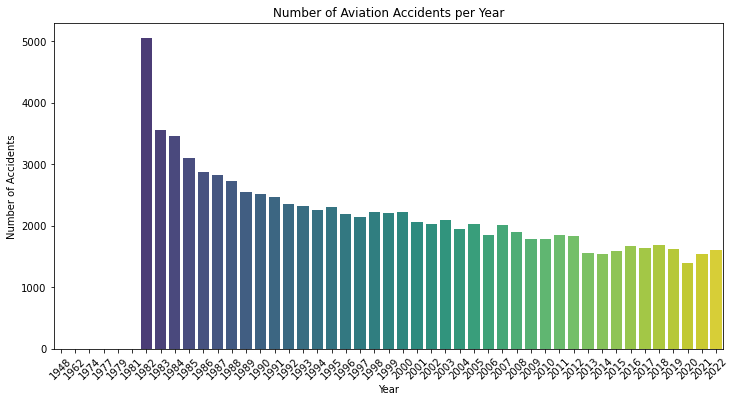

In [18]:
# Convert 'Event.Date' to datetime if it's not already
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')

# Extract the 'Year' from the 'Event.Date'
df_clean['Year'] = df_clean['Event.Date'].dt.year

# Plot number of accidents per year
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df_clean, palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Aviation Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


interpretation
there gradual decrease over the Years.
1982 had the highest number of accidents
The darker the colour the higher the number of accidents

#####  Accidents by Country
Identify which countries have the highest number of aviation accidents.

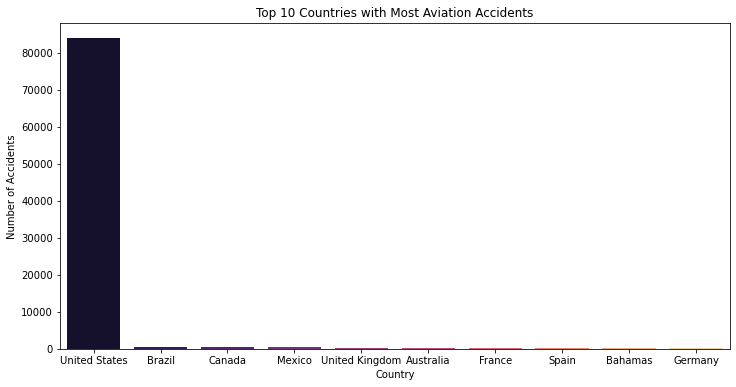

In [19]:
top_countries = df_clean['Country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title('Top 10 Countries with Most Aviation Accidents')
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.show()

interpretation
The United States has significantly high number of accidents compared to the rest of the countries

#####  Weather Conditions and Accidents
Examine the relationship between weather conditions and accident severity.

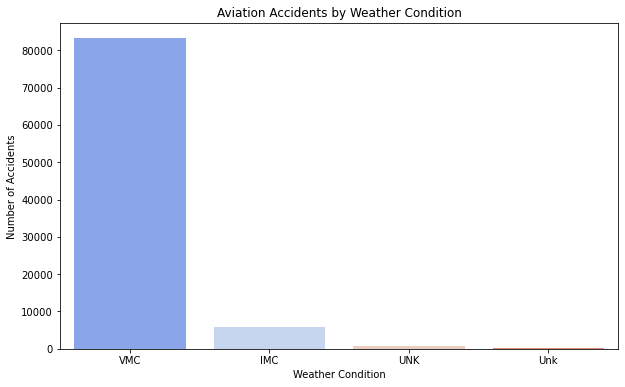

In [20]:
# Count of accidents by weather condition
weather_counts = df_clean['Weather.Condition'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')
plt.title('Aviation Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

interpretation
vmc means  fly by visual, on clear weather
From the bar plot above most crashes occur on clear weather(vmc) meaning that weather is not a significat factor affecting accident occurence.

##### Accident counts by aircraft Make
 Compare accident counts by aircraft make

In [21]:
df_clean['Make'].head(20)

0               Stinson
1                 Piper
2                Cessna
3              Rockwell
4                Cessna
5     Mcdonnell Douglas
6                Cessna
7                Cessna
8                Cessna
9        North American
10                Piper
11                Beech
12             Bellanca
13               Cessna
14               Navion
15                Beech
16              Enstrom
17               Cessna
18               Cessna
19                Smith
Name: Make, dtype: object

In [26]:

# Count the number of accidents per aircraft type
df_clean['Make'].value_counts()




Cessna                       23749
Piper                        12029
CESSNA                        4922
Beech                         4330
PIPER                         2841
                             ...  
HELICYCLE/MORRISEY RR            1
William John Schulz              1
Schulke                          1
SYMPHONY AIRCRAFT IND INC        1
HARBIN                           1
Name: Make, Length: 8237, dtype: int64

In [27]:
# Replacing repeated values in the Make column
Make_clean = df_clean['Make'].replace(['CESSNA', 'PIPER', 'BEECH', 'BELL', 'BOEING'], ['Cessna','Piper' ,'Beech', 'Bell', 'Boeing'])
Make_clean.head(10)

0              Stinson
1                Piper
2               Cessna
3             Rockwell
4               Cessna
5    Mcdonnell Douglas
6               Cessna
7               Cessna
8               Cessna
9       North American
Name: Make, dtype: object

In [29]:
accident_counts= Make_clean.value_counts()
accident_counts

Cessna             28671
Piper              14870
Beech               5372
Boeing              2745
Bell                2722
                   ...  
Holmgreen              1
BROCHETTI LOUIS        1
Reicher                1
Avery                  1
Concept                1
Name: Make, Length: 8232, dtype: int64

In [30]:
accident_counts.head(20)

Cessna               28671
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Grumman               1094
Mooney                1092
Robinson               946
Bellanca               886
Hughes                 795
Schweizer              629
Air Tractor            595
Mcdonnell Douglas      526
Aeronca                487
Maule                  445
Champion               428
De Havilland           382
Aero Commander         360
Stinson                348
Aerospatiale           342
Name: Make, dtype: int64

In [31]:
# Convert to DataFrame for easier plotting
accident_counts_df = accident_counts.reset_index()
accident_counts_df.columns = ['Make', 'Number of Accidents']
accident_counts_df 

,Make,Number of Accidents
0,Cessna,28671
1,Piper,14870
2,Beech,5372
3,Boeing,2745
4,Bell,2722
...,...,...
8227,Holmgreen,1
8228,BROCHETTI LOUIS,1
8229,Reicher,1
8230,Avery,1


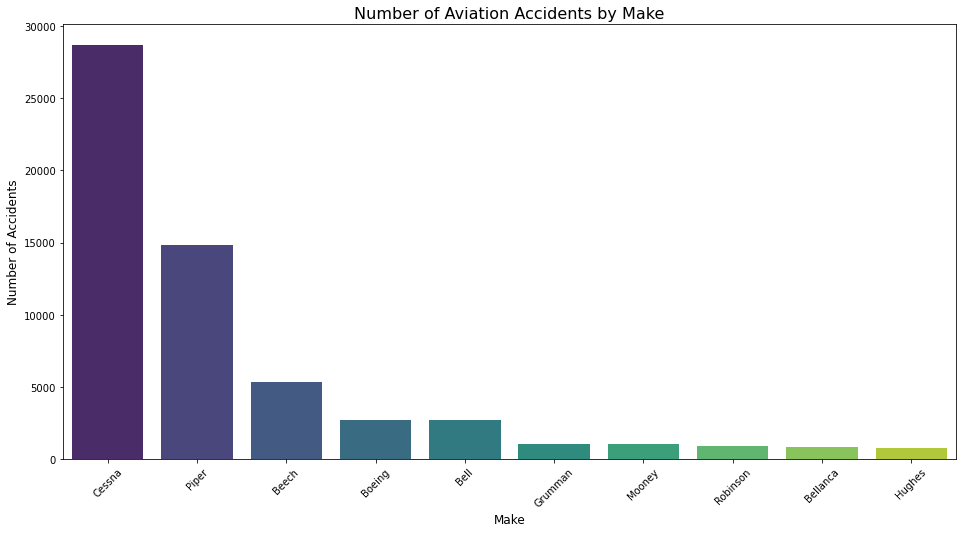

In [32]:
# Plot a bar chart
plt.figure(figsize=(16, 8))
sns.barplot(
    data=accident_counts_df.head(10),  # Top 10 aircraft types with the most accidents
    x='Make',
    y='Number of Accidents',
    palette='viridis'
)
plt.title('Number of Aviation Accidents by Make', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

interpretation
 The number of accidents in cessna is significatly higher than the other aeroplane makes  

#### Recommendations
1.The Aircraft Company should avoid purchasing the cessna airplane make since it is related to a high number of accident rates. The company should consider purchasing other makes that have fewer accident rates

2.THe United States should put more safety measyres to reduce and control the number of accidents.

3.it is imparative to continually enhance safety protocols, regulations and procedures to ensure there is reduced number of accidents in future.